# Stacked bar chart showing the EU electricity production by source in 2023

## Get the data

Load the data into a [Pandas](https://pandas.pydata.org/) dataframe and filter by year.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_ornaments.titles import set_title_and_subtitle

df = pd.read_csv('https://raw.githubusercontent.com/bianconif/graphic_communication_notebooks/refs/heads/master/data/eu-electricity-production.csv',comment='#')
df = df[df['Year'] == (year := 2023)]
print(df.head(10))

     Country  Year            Source  Value
207  Austria  2023         Bioenergy   4.56
208  Austria  2023              Coal   0.00
209  Austria  2023               Gas   7.50
210  Austria  2023             Hydro  40.67
211  Austria  2023           Nuclear   0.00
212  Austria  2023      Other Fossil   3.32
213  Austria  2023  Other Renewables   0.00
214  Austria  2023             Solar   6.39
215  Austria  2023              Wind   8.34
432  Belgium  2023         Bioenergy   3.80


Aggregate the primary sources of electricity into the following groups: *fossil*, *nuclear*, *solar*, *wind*, *hydro* and *other renewables*.

In [17]:
aggregated_classes = {'Bioenergy': 'Other renewables', 'Coal': 'Fossil', 'Gas': 'Fossil', 'Hydro': 'Hydro',
                      'Nuclear': 'Nuclear', 'Other fossil': 'Fossil', 'Other Renewables': 'Other renewables',
                      'Solar': 'Solar', 'Wind': 'Wind'}
df['Source-aggregated'] = df['Source'].map(aggregated_classes)
print(df.head())

     Country  Year     Source  Value Source-aggregated
207  Austria  2023  Bioenergy   4.56  Other renewables
208  Austria  2023       Coal   0.00            Fossil
209  Austria  2023        Gas   7.50            Fossil
210  Austria  2023      Hydro  40.67             Hydro
211  Austria  2023    Nuclear   0.00           Nuclear


Aggregate the electricity production values by country and source.

In [18]:
df = df.groupby(by=['Country', 'Source-aggregated']).agg({'Value': 'sum'}).reset_index()
print(df.head(10))

   Country Source-aggregated  Value
0  Austria            Fossil   7.50
1  Austria             Hydro  40.67
2  Austria           Nuclear   0.00
3  Austria  Other renewables   4.56
4  Austria             Solar   6.39
5  Austria              Wind   8.34
6  Belgium            Fossil  18.30
7  Belgium             Hydro   0.41
8  Belgium           Nuclear  32.93
9  Belgium  Other renewables   3.80


Sort the countries by total electricity production in the selected year and retain the first `n_countries`.

In [19]:
#Sort the countries by total electricity production
df_total_by_country = df.groupby(by='Country').agg('sum').reset_index()
df_total_by_country = df_total_by_country.sort_values(by='Value', ascending=False)

#Retain the first n_countries
top_countries = df_total_by_country.iloc[0:(n_countries := 10)]['Country']
df = df[df['Country'].isin(top_countries)]

print(top_countries)

9          France
10        Germany
25          Spain
14          Italy
26         Sweden
20         Poland
19    Netherlands
1         Belgium
8         Finland
5         Czechia
Name: Country, dtype: object


## Create the stacked bar chart

### Define a colour palette

Define a qualitative colour palette for the electricity production sources. Use shades of red, blue and orange respectively for fossil, hydro, and solar; of green for other renewables. Palette generated with [ColorBrewer 2.0](https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=6).

In [20]:
palette = {'Fossil': '#e41a1c', 'Hydro': '#377eb8', 'Solar': '#ff7f00', 'Other renewables': '#4daf4a',
           'Nuclear': '#a65628', 'Wind': '#984ea3'}

### Create the chart

Create an empty figure (`fig`) with one sub-plot (`ax`) using [Matplotlib's object oriented interface](https://matplotlib.org/stable/users/explain/figure/api_interfaces.html) [1]. Iterate through the electricity sources and generate the stacked bar chart as a series of bar plots placed on top of each other using Matplotlib's [`matplotlib.axes.Axes.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html) method. Use the `baseline` variable to store and update the *y* coordinates of the bottom sides of the bars at each iteration. Finally add a legend and rotate the *x*-axis tick labels vertically to avoid them from overlapping. 

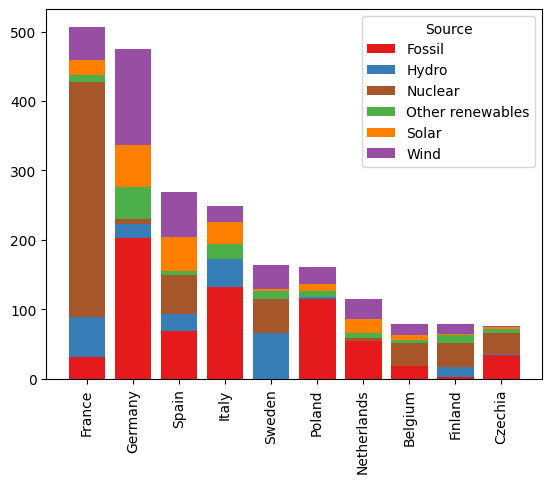

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1)

#y coordinates of the bottom sides of the bars
baseline = np.zeros(df['Country'].nunique())

for class_name, class_grp in df.groupby(by='Source-aggregated'):

    #Sort the bars from left to right by total electricity production in descending order
    class_grp = class_grp.set_index(keys='Country')
    class_grp = class_grp.loc[top_countries]
    class_grp = class_grp.reset_index()
    
    values = class_grp['Value'].to_numpy()

    #Create the stack for the current class of electricity source
    ax.bar(x=class_grp['Country'], height=values, label=class_name, bottom=baseline, facecolor=palette[class_name])

    #Update the y coordinates of the bottom sides of the bars
    baseline = baseline + values

ax.legend(title='Source')
ax.tick_params('x', rotation=90)

## Get the appearance right

### Remove the spines and the axes' labels

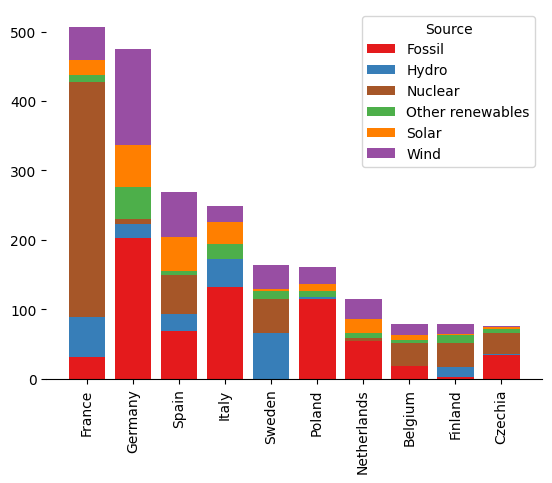

In [22]:
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.set_xlabel(None)
ax.set_ylabel(None)
display(fig)

### Add a horizontal grid

Use [matplotlib.axes.Axes.grid](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html) to add a horizontal grid and [Axes.set_axisbelow](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html) to send the grid to the background (just comment out this call if you'd rather have the grid in the foreground).

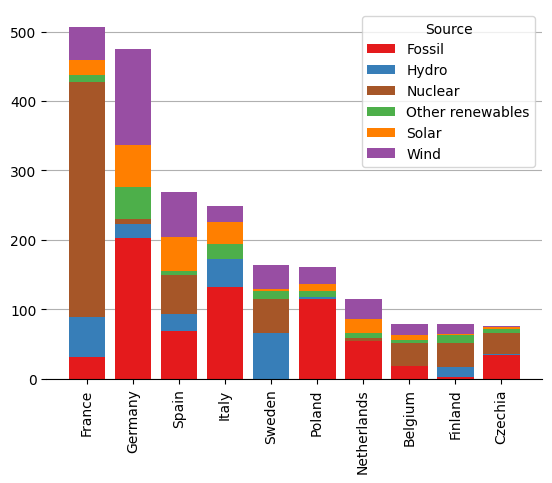

In [23]:
ax.grid(visible=None, which='major', axis='y')
ax.set_axisbelow(True)
display(fig)

## Add title and subtitle

Add a title and subtitle to the chart with [`mpl_ornaments.set_title_and_subtitle`](https://bianconif.github.io/mpl_ornaments/reference/).

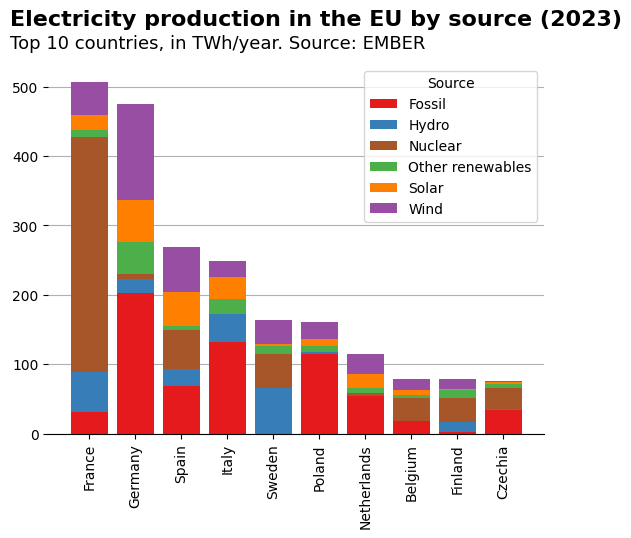

In [24]:
title = f'Electricity production in the EU by source ({year})'
subtitle = f'Top {n_countries} countries, in TWh/year. Source: EMBER'
set_title_and_subtitle(fig=fig, title=title, subtitle=subtitle, alignment='left', h_offset=30)
display(fig)

## References

[1] Bianconi F. [Data and process visualisation for graphic communication: A hands-on approach with Python](https://link.springer.com/book/10.1007/978-3-031-57051-3). Cham: Springer, 2024.

## Licence

Copyright © 2025 [Francesco Bianconi](https://www.bianconif.net/Home.html). All rights reserved.